# Sử dụng Python lấy và chuyển đổi dữ liệu từ web

In [1]:
from bs4 import BeautifulSoup
import requests as re
import pandas as pd
import numpy as np

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# *Dữ liệu quy mô các cty tại US tính theo doanh thu
### ** Dữ liệu cần lấy là table đầu tiên.

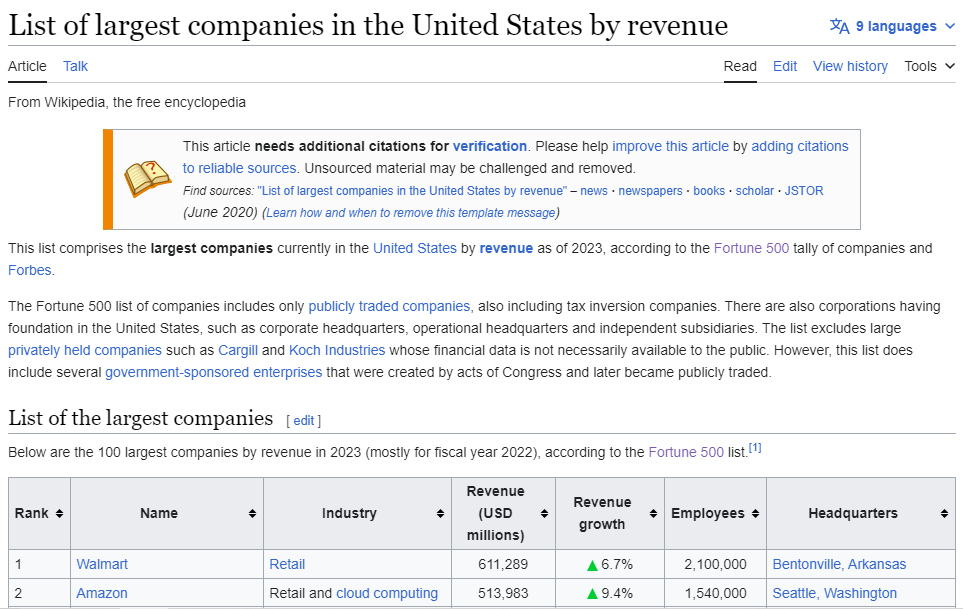

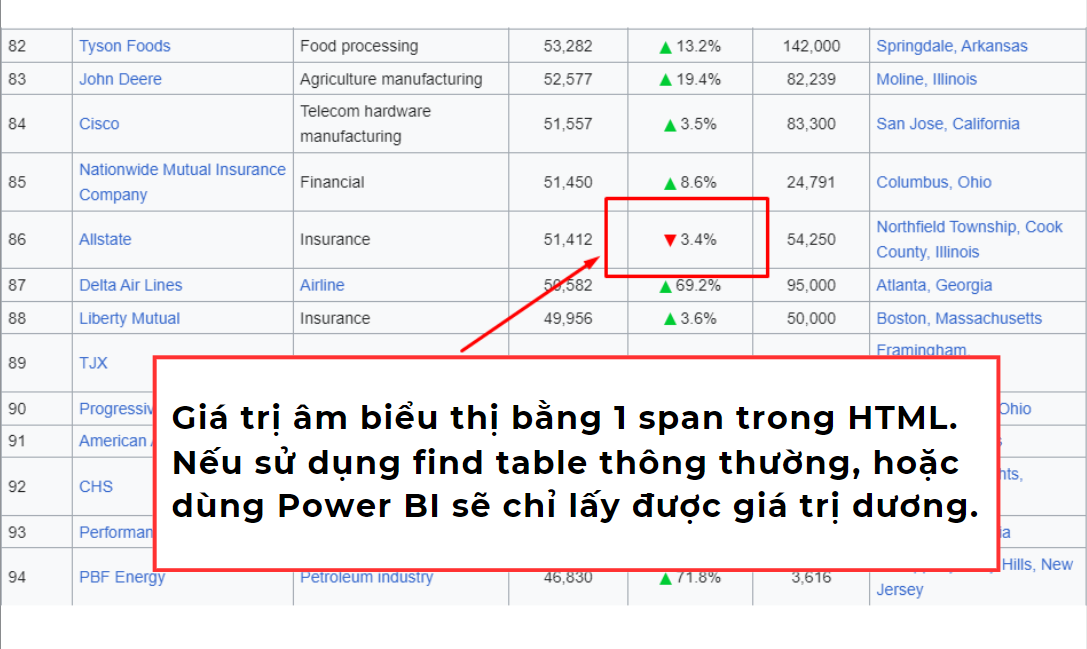



In [3]:
page = re.get(url)
page
# 200 is okay

<Response [200]>

In [4]:
soup = BeautifulSoup(page.text,'html')
# lấy text từ url, định dạng lại html từ Bs4


In [5]:
type(soup)

bs4.BeautifulSoup

### *Tìm table

In [6]:
table_1 = soup.find_all("table", class_="wikitable sortable")[0]
# table_1
# lấy ra bảng đầu tiên

In [7]:
# Columns của table nằm trong thẻ <th>
# lọc hết thẻ <th> ra
table_columns = table_1.find_all('th')
table_columns

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [8]:
# lọc ra text trong list vừa lấy được
for tile in table_columns:
    print(tile.text)

Rank

Name

Industry

Revenue (USD millions)

Revenue growth

Employees

Headquarters



In [9]:
# Đã okay, viết hàm bỏ text vào list columns
columns_tile = [tile.text for tile in table_columns]
columns_tile

['Rank\n',
 'Name\n',
 'Industry\n',
 'Revenue (USD millions)\n',
 'Revenue growth\n',
 'Employees\n',
 'Headquarters\n']

In [10]:
# bỏ phần xuống dòng đi
columns_tile = [tile.text.strip() for tile in table_columns]
columns_tile

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

***Lấy các row data

In [11]:
table_row = table_1.find_all('tr')
# Check nội dung row ngẫu nhiên
# table_row[2]
# mỗi row có chứa các cột data

In [12]:
# # bỏ đi cột đầu tiên do nó là tiêu đề bảng : table_row[1:]
# for row in table_row[1:]:
#     # lấy ra từng row, tìm từng td, tạo thành list để phân biệt cho từng cột giá trị
#     data_row = row.find_all('td')
#     data = [data.text.strip() for data in data_row]
#     print(data)
    
#     # thêm vào DataFrame, đếm số hàng của Frame để lấy index, tại index đó thêm data vào.
#     len_dt = len(dt)
#     dt.loc[len_dt]= data

# *Tạo Data Frame với các cột đã lọc ở trên

In [13]:
Data_Frame =pd.DataFrame(columns= columns_tile)
Data_Frame

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


## **Xử lý span 'Decrease' để đổi dấu giá trị nhận được

In [14]:
table_row = table_1.find_all('tr')

In [15]:
for row in table_row[1:]:
    # lấy ra từng row, tìm từng td, tạo thành list để phân biệt cho từng cột giá trị
    data_row = row.find_all('td')
    data = [data.text.strip() for data in data_row]
    
    # data[3] và data[5] có dấu phẩy, bỏ đi để sau này đổi kiểu dữ liệu thành float.
    data[3] = data[3].replace(',','')
    data[5] = data[5].replace(',','')
    
    #data[4] là vị trí chứa giá trị % âm hoặc dương, bỏ dấu % cho dễ tính
    data[4] = data[4].strip('%')
    
    # list chứa span có title là 'Decrease', nếu có 1 giá trị tức nó là dòng chứa giá trị âm
    if len(data_row[4].find_all('span', {'title' : 'Decrease'}))==1:
        # Thêm dấu âm vào text
        data[4] = '-' + data[4]
        # print(data[4])
        
    Data_Frame.loc[len(Data_Frame)]= data
    
  

### *Kiểm tra vị trí giá trị âm đã đúng chưa?

In [24]:
# tại index 27, row này có revenue growth là -10,7
Data_Frame[Data_Frame['Rank']=='27']

,Rank,Name,Industry,Revenue (USD millions),Revenue growth (%),Employees,Headquarters
26,27,Walgreens Boots Alliance,Pharmaceutical industry,132703.0,-10.7,262500,"Deerfield, Illinois"


In [17]:
Data_Frame.rename(columns= {'Revenue growth':'Revenue growth (%)'}, inplace = True)

# * Xem data đã lấy được

In [18]:
Data_Frame.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth (%),Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [19]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth (%)      100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [20]:
# Đổi kiểu dữ liệu của Revenue (USD millions)	Revenue growth (%)	Employees
Data_Frame = Data_Frame.astype(dtype={'Revenue (USD millions)': np.float32, 'Revenue growth (%)': np.float32,'Employees':np.int64})

In [21]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float32
 4   Revenue growth (%)      100 non-null    float32
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float32(2), int64(1), object(4)
memory usage: 5.5+ KB


In [22]:
Data_Frame.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth (%),Employees,Headquarters
0,1,Walmart,Retail,611289.0,6.700000,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983.0,9.400000,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680.0,44.799999,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328.0,7.800000,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162.0,12.700000,400000,"Minnetonka, Minnesota"
